In [3]:
# Loading the necessary imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import os

from plotly.offline import init_notebook_mode

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)

In [4]:
# Loading the data.
df = pd.read_csv('african_crises.csv')
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


## Exploratory Data Analysis

In [5]:
# Check the statistics of the data.
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [6]:
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [7]:
# Inspect the info of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [8]:
# Check the shape of the data.
df.shape

(1059, 14)

In [9]:
# Check the total missing numbers
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [10]:
# Check for correlation among the columns
df.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


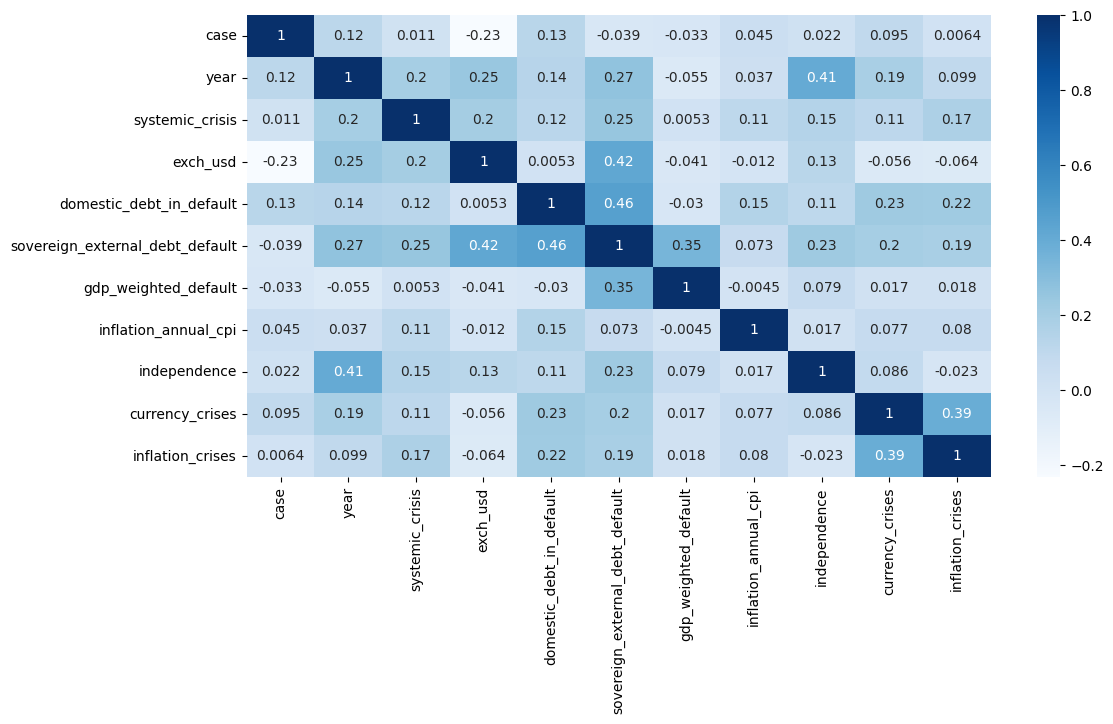

In [11]:
# Heatmap to visualize the correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

## Data Visualization

In [12]:
# Visualizing bank crisis count.
fig = px.histogram(df,x='banking_crisis',color='banking_crisis',color_discrete_map={'crisis':'red','no_crisis':'Blue'},template='plotly_dark')
fig.show(renderer='colab')

In [13]:
# Country-wise inflation over the years
fig=px.line(df.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Annual Inflation Rate per Country over the years')
fig.update_traces(showlegend=False)
fig.show(renderer='colab')

In [14]:
# Visualizing Exchange rates
fig=px.line(df.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)
fig.show(renderer='colab')

In [15]:
# Inflation rates per country
fig = px.bar(df,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')
fig.show(renderer='colab')

In [16]:
# Country exchange rates
fig = px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')
fig.show(renderer='colab')

In [17]:
# Annual Inflation Rate
fig = px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.thermal,title='<b>Annual inflation rate of countries in Africa continent',template='plotly_dark')
fig.show(renderer='colab')

In [18]:
# Currency Crises among the countries
fig = px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')
fig.show(renderer='colab')

In [19]:
# Inflation Crisies among the countries
fig = px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')
fig.show(renderer='colab')

## Data Preprocessing

In [20]:
# Creaing a copy of the dataframe
df_bk = df.copy()

In [21]:
# Encoding the columns
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [22]:
# Dropping the target variable
x = df.drop('banking_crisis', axis=1)
y = df['banking_crisis']


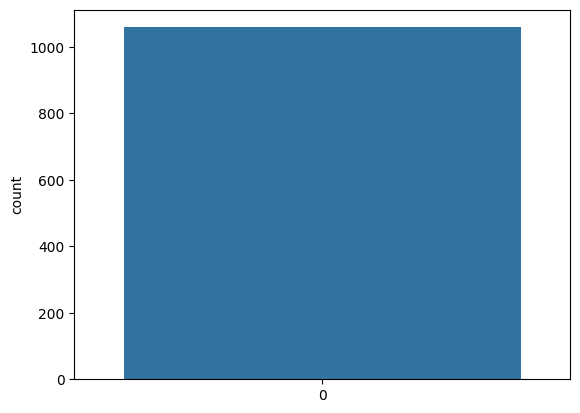

In [23]:
sns.countplot(df['banking_crisis'])
plt.show()

In [24]:
from imblearn.over_sampling import RandomOverSampler

oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

      case  cc3  country  year  systemic_crisis      exch_usd  \
0        1    3        0  1870                1  5.226400e-02   
1        1    3        0  1871                0  5.279800e-02   
2        1    3        0  1872                0  5.227400e-02   
3        1    3        0  1873                0  5.168000e-02   
4        1    3        0  1874                0  5.130800e-02   
...    ...  ...      ...   ...              ...           ...   
1104    19    4        3  1982                1  7.000000e-01   
1105    45    8        8  1993                1  2.188184e+01   
1106     2    0        1  1995                0  5.692000e-03   
1107    70   12       12  1999                1  3.720000e-25   
1108    45    8        8  2013                1  1.552000e+02   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   
2                 

In [25]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((776, 13), (333, 13), (776,), (333,))

In [26]:
# Pre-processing the data
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [27]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[291   2]
 [  5  35]]
Outcome values : 
 291 2 5 35
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       293
           0       0.95      0.88      0.91        40

    accuracy                           0.98       333
   macro avg       0.96      0.93      0.95       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.9 %
Precision : 98.3 %
Recall : 99.3 %
F1 Score : 0.988
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 93.4 %
MCC : MCC
roc_auc_score: 0.934


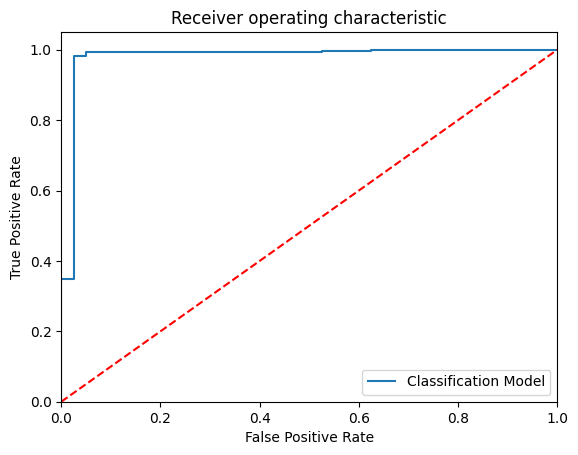

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  1 292]
 [  3  37]]
Outcome values : 
 1 292 3 37
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.00      0.01       293
           0       0.11      0.93      0.20        40

    accuracy                           0.11       333
   macro avg       0.18      0.46      0.10       333
weighted avg       0.23      0.11      0.03       333

Accuracy : 11.4 %
Precision : 25.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 46.4 %
MCC : MCC
roc_auc_score: 0.464


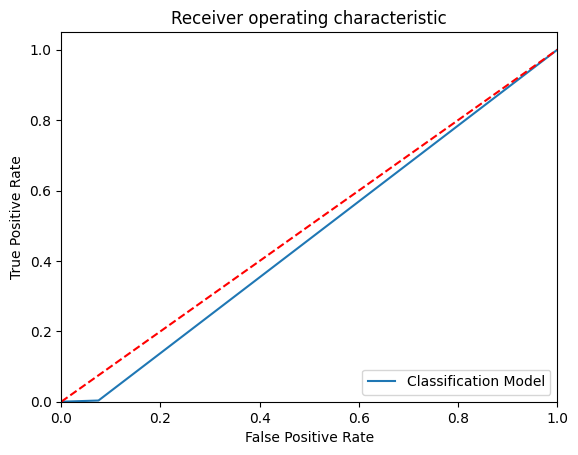

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[288   5]
 [  1  39]]
Outcome values : 
 288 5 1 39
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       293
           0       0.89      0.97      0.93        40

    accuracy                           0.98       333
   macro avg       0.94      0.98      0.96       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 98.2 %
Precision : 99.7 %
Recall : 98.3 %
F1 Score : 0.99
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 97.9 %
MCC : MCC
roc_auc_score: 0.979


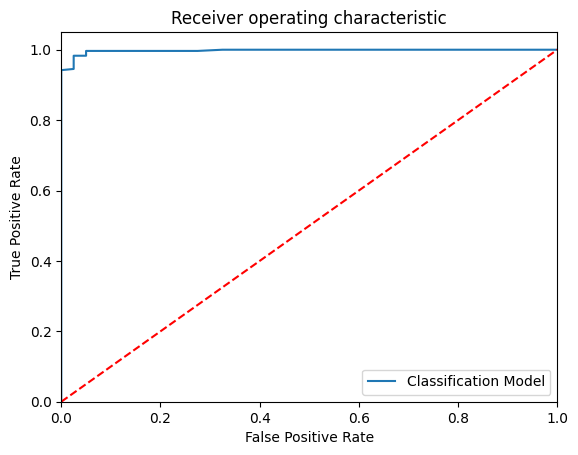

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[290   3]
 [  2  38]]
Outcome values : 
 290 3 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.93      0.95      0.94        40

    accuracy                           0.98       333
   macro avg       0.96      0.97      0.96       333
weighted avg       0.99      0.98      0.99       333

Accuracy : 98.5 %
Precision : 99.3 %
Recall : 99.0 %
F1 Score : 0.991
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 97.0 %
MCC : MCC
roc_auc_score: 0.97


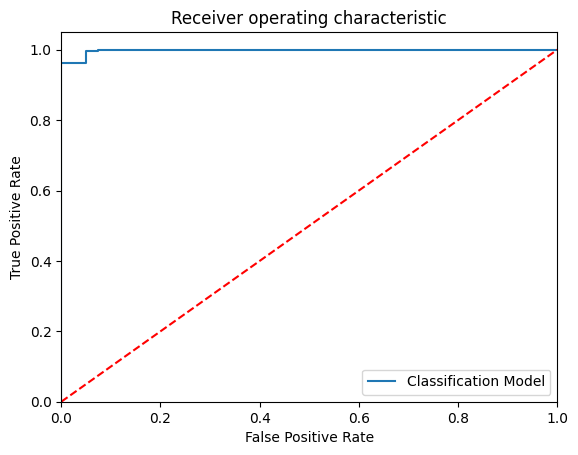

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[290   3]
 [  2  38]]
Outcome values : 
 290 3 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.93      0.95      0.94        40

    accuracy                           0.98       333
   macro avg       0.96      0.97      0.96       333
weighted avg       0.99      0.98      0.99       333

Accuracy : 98.5 %
Precision : 99.3 %
Recall : 99.0 %
F1 Score : 0.991
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 97.0 %
MCC : MCC
roc_auc_score: 0.97


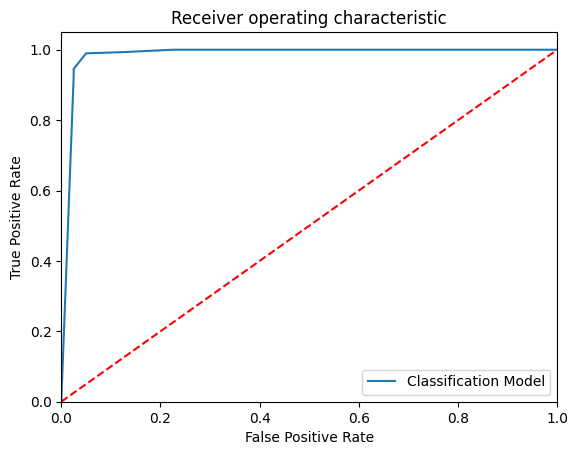

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[291   2]
 [  2  38]]
Outcome values : 
 291 2 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.95      0.95      0.95        40

    accuracy                           0.99       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.99      0.99      0.99       333

Accuracy : 98.8 %
Precision : 99.3 %
Recall : 99.3 %
F1 Score : 0.993
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 97.2 %
MCC : MCC
roc_auc_score: 0.972


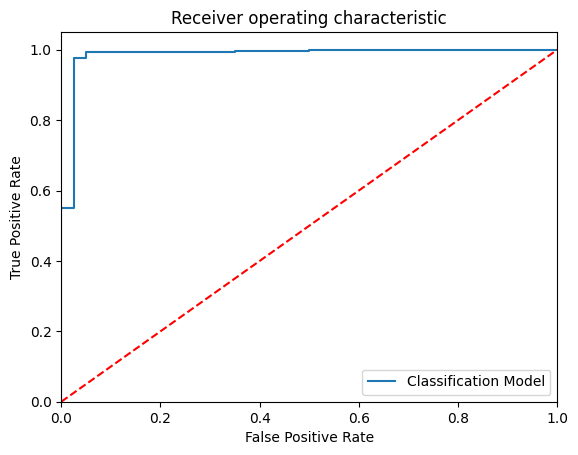

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : MCC
roc_auc_score: 0.502


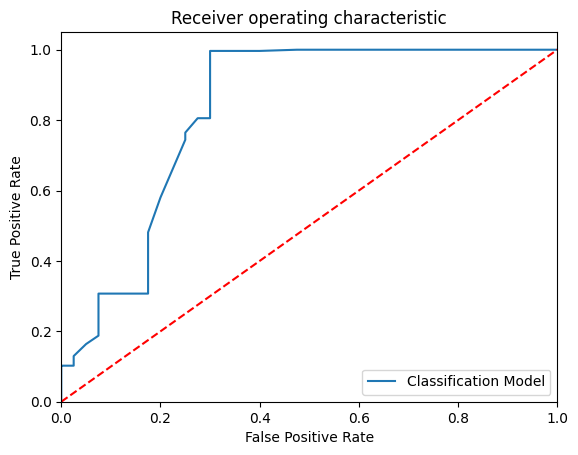

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[276  17]
 [  1  39]]
Outcome values : 
 276 17 1 39
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.94      0.97       293
           0       0.70      0.97      0.81        40

    accuracy                           0.95       333
   macro avg       0.85      0.96      0.89       333
weighted avg       0.96      0.95      0.95       333

Accuracy : 94.6 %
Precision : 99.6 %
Recall : 94.2 %
F1 Score : 0.968
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 95.8 %
MCC : MCC
roc_auc_score: 0.958


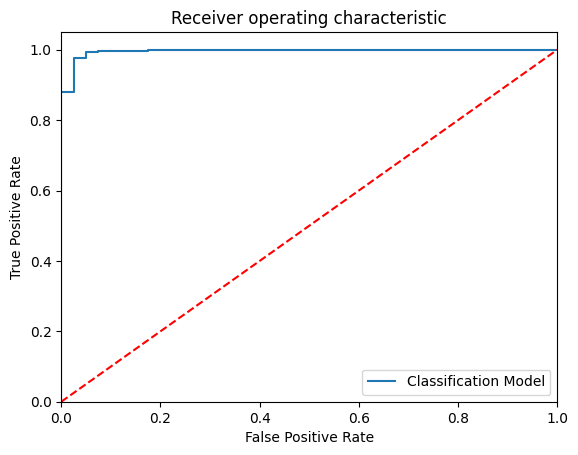

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[281  12]
 [  3  37]]
Outcome values : 
 281 12 3 37
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97       293
           0       0.76      0.93      0.83        40

    accuracy                           0.95       333
   macro avg       0.87      0.94      0.90       333
weighted avg       0.96      0.95      0.96       333

Accuracy : 95.5 %
Precision : 98.9 %
Recall : 95.9 %
F1 Score : 0.974
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 94.2 %
MCC : MCC
roc_auc_score: 0.942


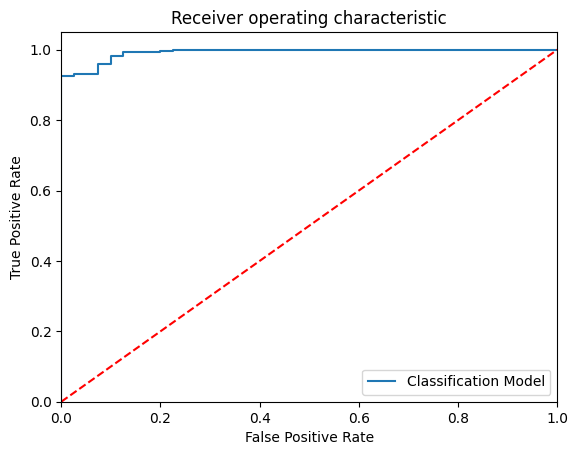

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : MCC
roc_auc_score: 0.502


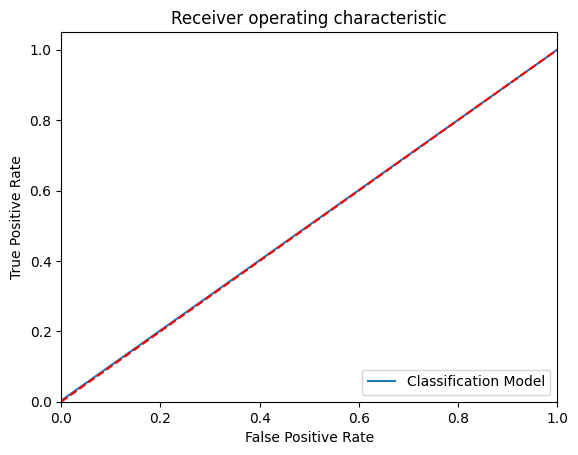

-----------------------------------------------------------------------------------------------------


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()


MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp,
               'False Negative' : fn,
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [29]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),291.0,2.0,5.0,35.0,0.979,0.983,0.993,0.988,0.875,0.898,0.934087,0.934
1,DecisionTreeClassifier(),1.0,292.0,3.0,37.0,0.114,0.250,0.003,0.007,0.925,-0.214,0.464206,0.464
2,"(DecisionTreeClassifier(max_features='sqrt', r...",288.0,5.0,1.0,39.0,0.982,0.997,0.983,0.990,0.975,0.920,0.978968,0.979
3,"(ExtraTreeClassifier(random_state=545910800), ...",290.0,3.0,2.0,38.0,0.985,0.993,0.990,0.991,0.950,0.930,0.969881,0.970
4,KNeighborsClassifier(),290.0,3.0,2.0,38.0,0.985,0.993,0.990,0.991,0.950,0.930,0.969881,0.970
5,SVC(probability=True),291.0,2.0,2.0,38.0,0.988,0.993,0.993,0.993,0.950,0.943,0.971587,0.972
6,(DecisionTreeClassifier(random_state=118927562...,1.0,292.0,0.0,40.0,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501
7,([DecisionTreeRegressor(criterion='friedman_ms...,276.0,17.0,1.0,39.0,0.946,0.996,0.942,0.968,0.975,0.797,0.958490,0.958
8,LGBMClassifier(),281.0,12.0,3.0,37.0,0.955,0.989,0.959,0.974,0.925,0.811,0.942022,0.942
9,GaussianNB(),1.0,292.0,0.0,40.0,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501


In [30]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,SVC,0.988,0.993,0.993,0.993,291.0,2.0,2.0,38.0
1,ExtraTreesClassifier,0.985,0.993,0.990,0.991,290.0,3.0,2.0,38.0
2,KNeighborsClassifier,0.985,0.993,0.990,0.991,290.0,3.0,2.0,38.0
3,RandomForestClassifier,0.982,0.997,0.983,0.990,288.0,5.0,1.0,39.0
4,LogisticRegression,0.979,0.983,0.993,0.988,291.0,2.0,5.0,35.0
5,LGBMClassifier,0.955,0.989,0.959,0.974,281.0,12.0,3.0,37.0
6,GradientBoostingClassifier,0.946,0.996,0.942,0.968,276.0,17.0,1.0,39.0
7,BaggingClassifier,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0
8,GaussianNB,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0
9,DecisionTreeClassifier,0.114,0.250,0.003,0.007,1.0,292.0,3.0,37.0


## From this we can clearly see that the Support Vector Classifier is our best model.

In [31]:
y_pred = ModelSVM.predict(x_test)
out = pd.DataFrame({'actual':y_test,'predicted':y_pred})
out = df_bk.merge(out,left_index = True,right_index = True)
out['actual'].replace(1,'no_crisis',inplace = True)
out['actual'].replace(0,'crisis',inplace = True)
out['predicted'].replace(1,'no_crisis',inplace = True)
out['predicted'].replace(0,'crisis',inplace = True)
out[['country','year','banking_crisis','predicted']].sample(10)

,country,year,banking_crisis,predicted
371,Egypt,1948,no_crisis,no_crisis
430,Egypt,2007,no_crisis,no_crisis
1046,Zimbabwe,2001,crisis,crisis
351,Egypt,1928,no_crisis,no_crisis
861,Tunisia,1979,no_crisis,no_crisis
83,Algeria,2013,no_crisis,no_crisis
997,Zimbabwe,1952,no_crisis,no_crisis
96,Angola,1932,no_crisis,no_crisis
706,Nigeria,2013,crisis,crisis
477,Kenya,1987,crisis,crisis
